In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"D:\DS PYTHON\Assignment\EastWestAirlines.csv")

In [3]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


### EDA

In [4]:
# droping the id column

In [5]:
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=250

In [6]:
df.drop(columns=['ID#'],inplace=True)

In [7]:
df.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0


In [8]:
# Taking Important column

In [9]:
data=df.loc[:,['Balance','Flight_miles_12mo','Days_since_enroll','Bonus_miles']]

In [10]:
data.head()

,Balance,Flight_miles_12mo,Days_since_enroll,Bonus_miles
0,28143,0,7000,174
1,19244,0,6968,215
2,41354,0,7034,4123
3,14776,0,6952,500
4,97752,2077,6935,43300


In [11]:
data.describe()

,Balance,Flight_miles_12mo,Days_since_enroll,Bonus_miles
count,3.999000e+03,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,460.055764,4118.55939,17144.846212
std,1.007757e+05,1400.209171,2065.13454,24150.967826
min,0.000000e+00,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,2330.00000,1250.000000
50%,4.309700e+04,0.000000,4096.00000,7171.000000
75%,9.240400e+04,311.000000,5790.50000,23800.500000
max,1.704838e+06,30817.000000,8296.00000,263685.000000


### Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc=StandardScaler()
x=sc.fit_transform(data)
x

array([[-4.51140783e-01, -3.28603258e-01,  1.39545434e+00,
        -7.02786266e-01],
       [-5.39456874e-01, -3.28603258e-01,  1.37995704e+00,
        -7.01088399e-01],
       [-3.20031232e-01, -3.28603258e-01,  1.41192021e+00,
        -5.39252702e-01],
       ...,
       [-4.29480975e-05, -3.28603258e-01, -1.31560393e+00,
         3.43803696e-01],
       [-1.85606976e-01,  2.85309024e-02, -1.31608822e+00,
        -6.89286154e-01],
       [-7.00507951e-01, -3.28603258e-01, -1.31754109e+00,
        -7.09991847e-01]])

### Clustering

In [16]:
km=KMeans()
y=km.fit_predict

### Elbow Graph

In [17]:
wcss=[]
for i in range(1,21):
    km=KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)
    
wcss

[15996.000000000015,
 12008.379024960848,
 9606.180416637266,
 7708.1365052637475,
 6470.727457797341,
 5862.808804081705,
 5369.646307754942,
 4865.898425425997,
 4424.50190071462,
 4109.1842536845415,
 3812.2295354895864,
 3597.706211827423,
 3411.0232319551033,
 3286.692332884487,
 3130.56627050937,
 2983.9866039809312,
 2878.6425055700347,
 2759.3344072337986,
 2699.693004047369,
 2597.458751782705]

Text(0, 0.5, 'wcss value')

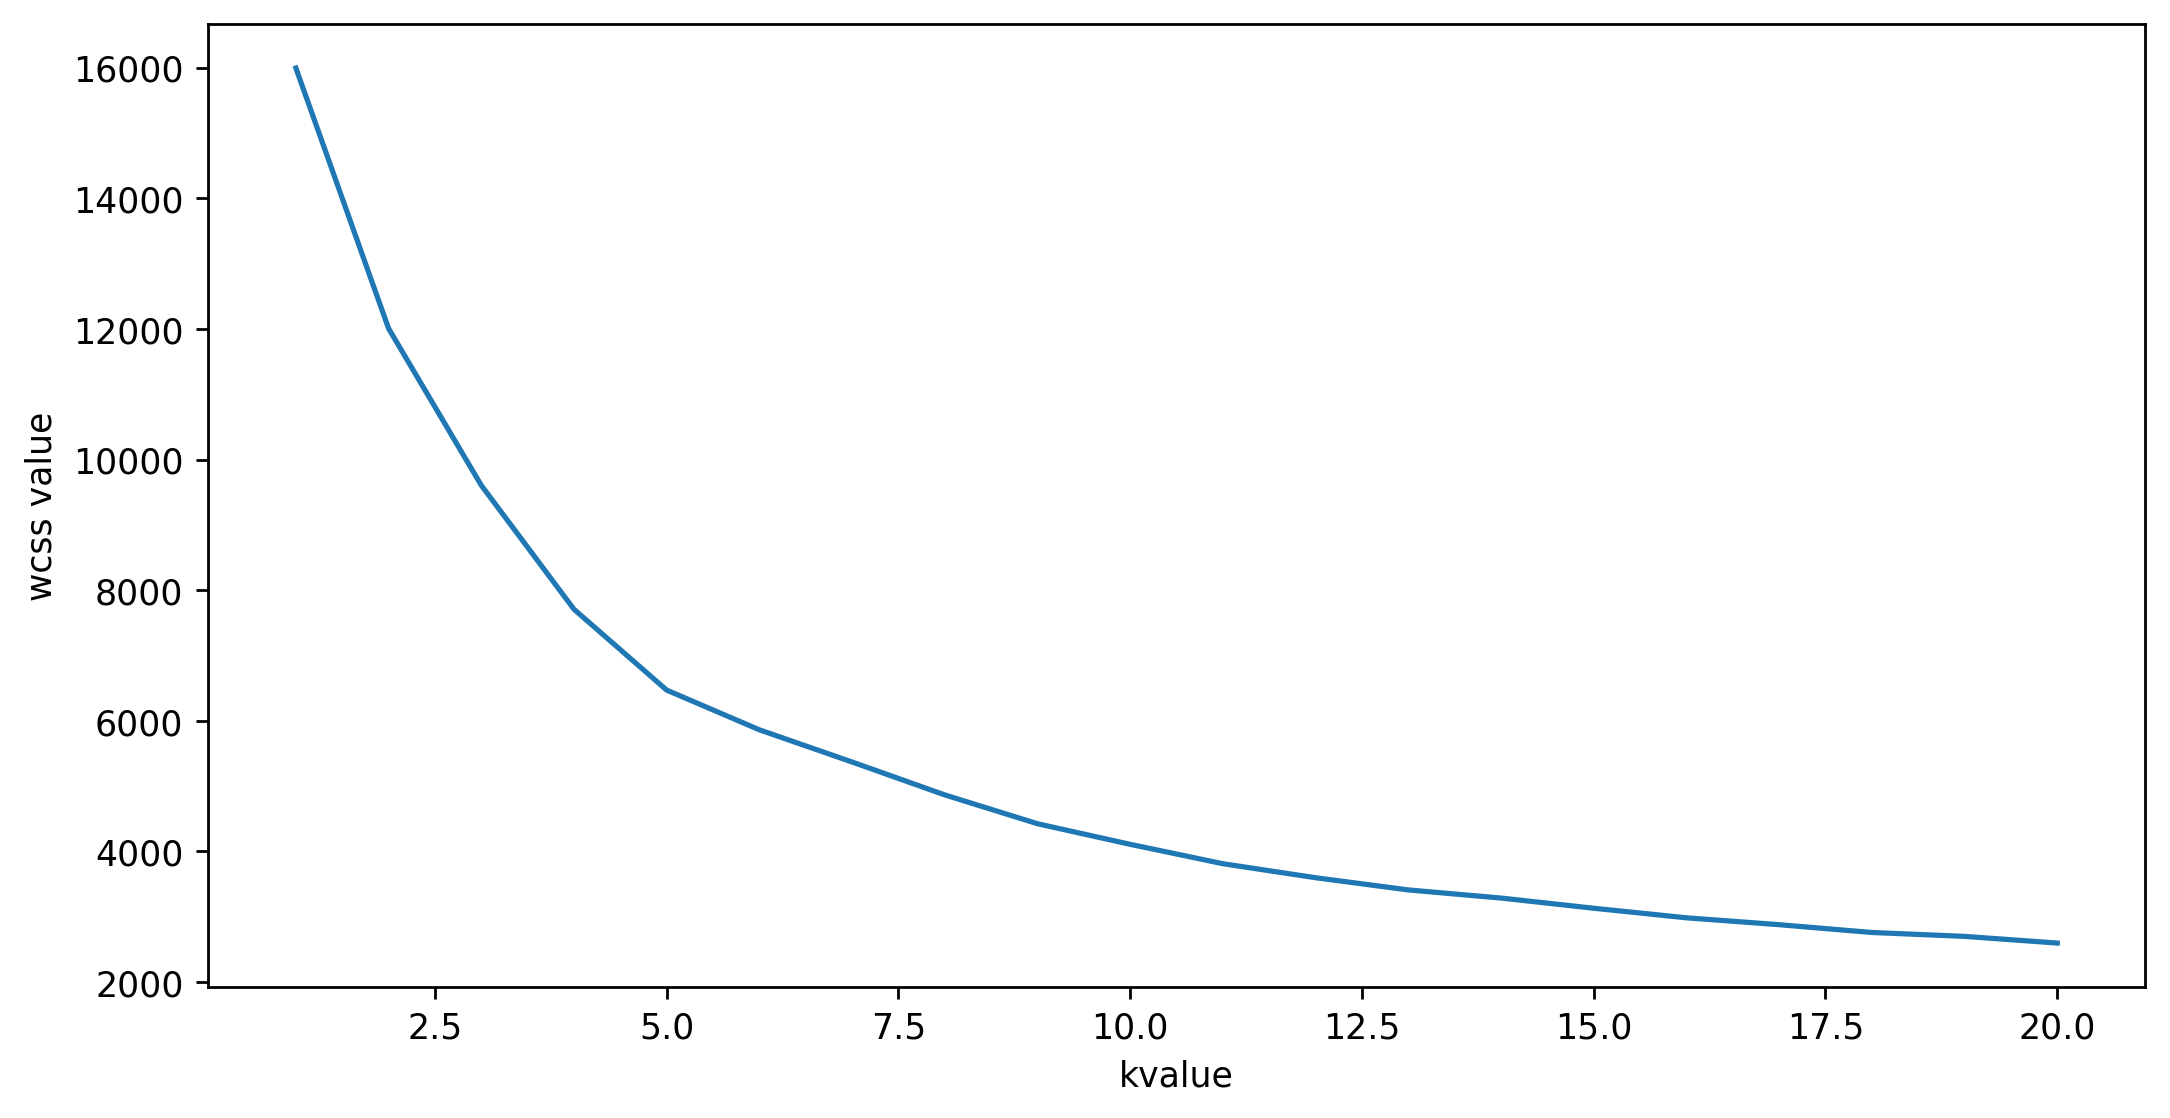

In [18]:
plt.plot(range(1,21),wcss)
plt.xlabel('kvalue')
plt.ylabel('wcss value')

### Final model

In [19]:
km=KMeans(n_clusters=5)
y=km.fit_predict(x)
y

array([0, 0, 0, ..., 3, 3, 3])

In [31]:
data['cluster']=y

In [32]:
data

,Balance,Flight_miles_12mo,Days_since_enroll,Bonus_miles,cluster
0,28143,0,7000,174,0
1,19244,0,6968,215,0
2,41354,0,7034,4123,0
3,14776,0,6952,500,0
4,97752,2077,6935,43300,2
...,...,...,...,...,...
3994,18476,200,1403,8525,3
3995,64385,0,1395,981,3
3996,73597,0,1402,25447,3
3997,54899,500,1401,500,3


In [33]:
data.groupby('cluster').agg('mean').reset_index()

,cluster,Balance,Flight_miles_12mo,Days_since_enroll,Bonus_miles
0,0,58768.766349,256.016349,5829.465940,9047.433243
1,1,533550.428571,1313.505495,6272.692308,52471.417582
2,2,124694.609715,417.500838,4942.787270,56615.807370
3,3,40742.099712,203.814986,2271.815562,7763.859366
4,4,133109.685185,6866.064815,4159.296296,29960.888889


In [34]:
km.cluster_centers_

array([[-0.14720236, -0.14573889,  0.8285758 , -0.3353251 ],
       [ 4.56465973,  0.60959211,  1.04322612,  1.46292229],
       [ 0.5070636 , -0.03039564,  0.39916574,  1.63454721],
       [-0.3261039 , -0.18302467, -0.89436051, -0.38847967],
       [ 0.59057709,  4.57560933,  0.0197285 ,  0.53073009]])

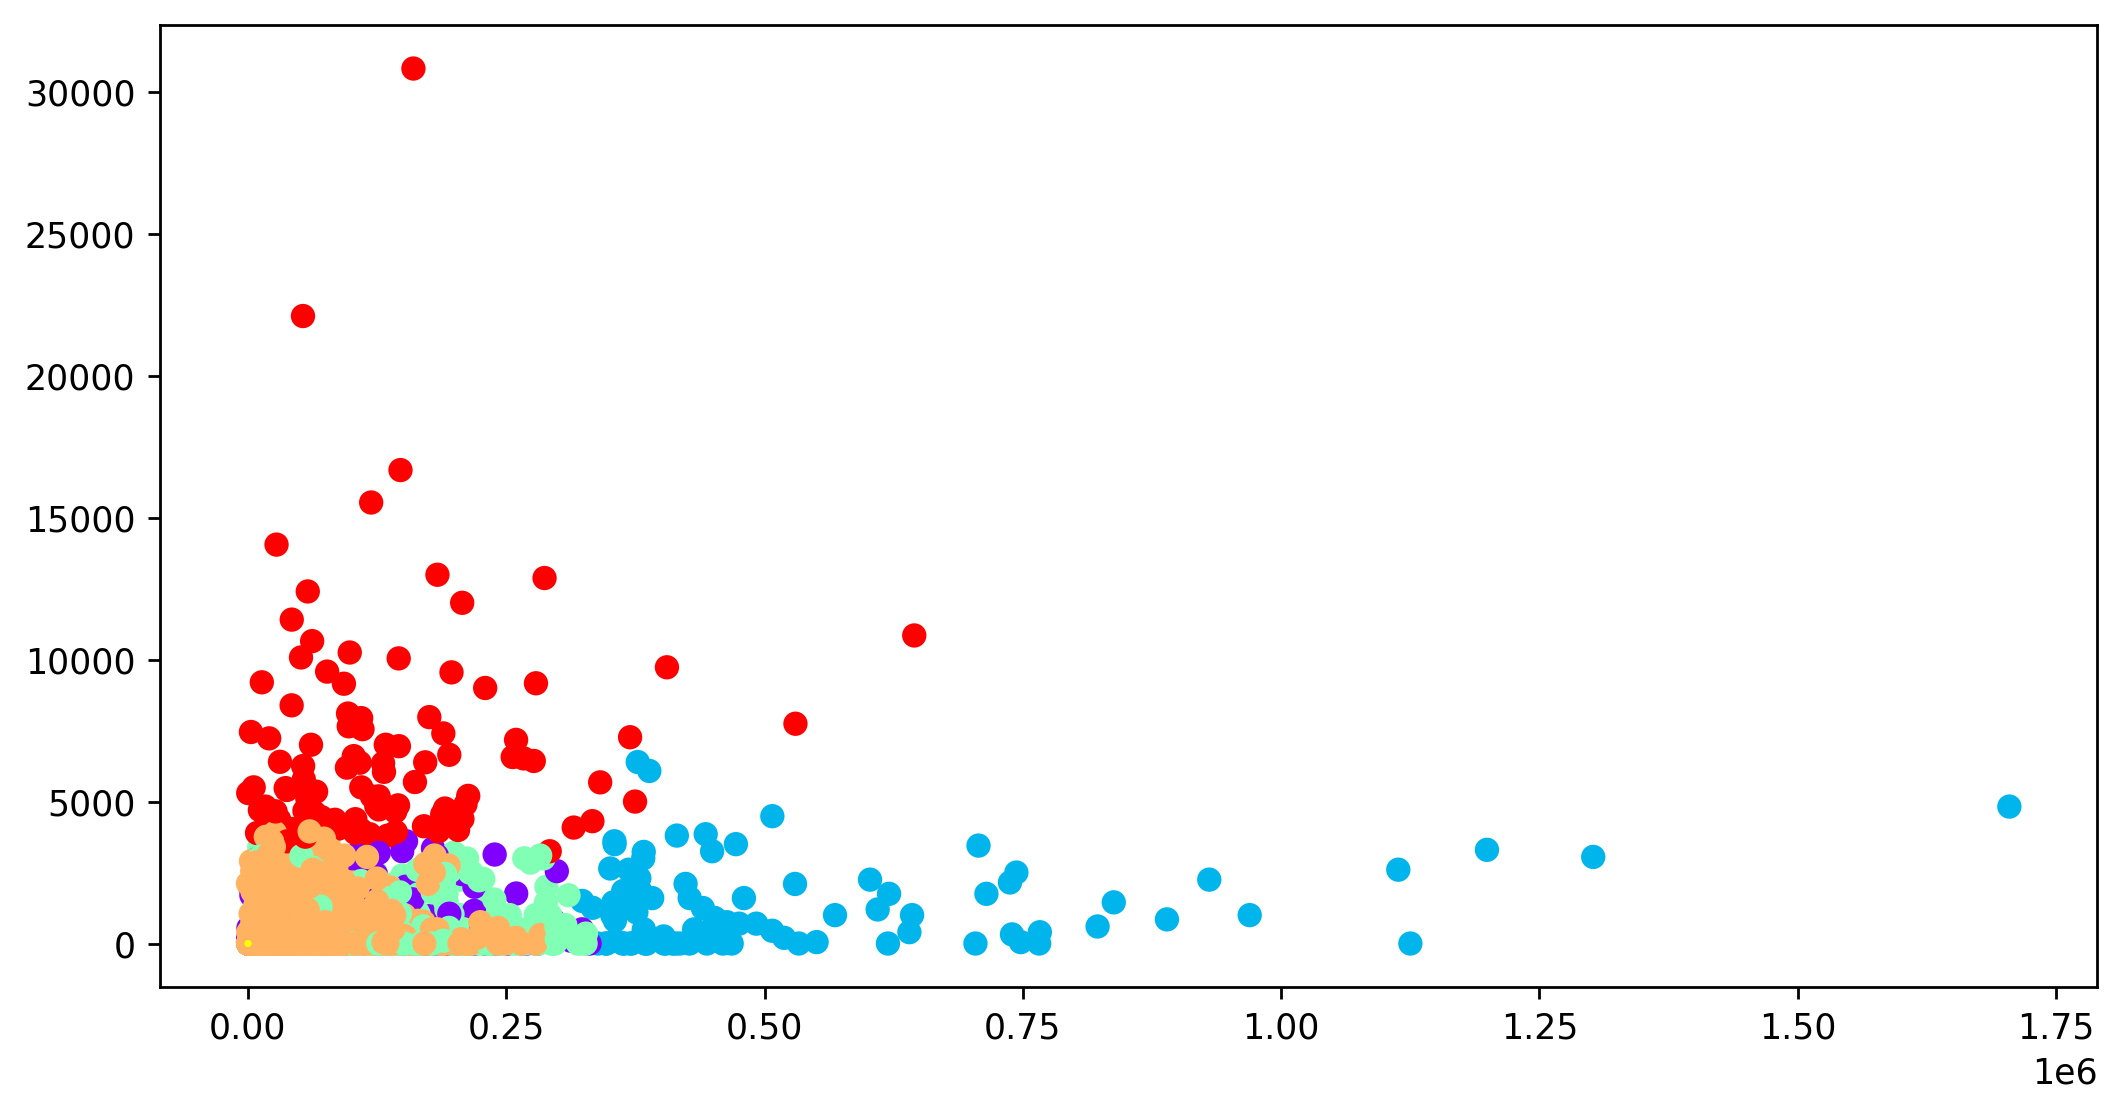

In [36]:
plt.scatter(data['Balance'],data['Flight_miles_12mo'],c=data['cluster'],cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],km.cluster_centers_[:,2],c='yellow')

### Evaluation of KMeans

In [37]:
from sklearn.metrics import silhouette_score

In [38]:
silhouette_score(x,y)

0.35857330038278346

In [42]:
from yellowbrick.cluster import SilhouetteVisualizer

In [40]:
model=KMeans(n_clusters=5)

In [43]:
vis=SilhouetteVisualizer(model)

SilhouetteVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=5))

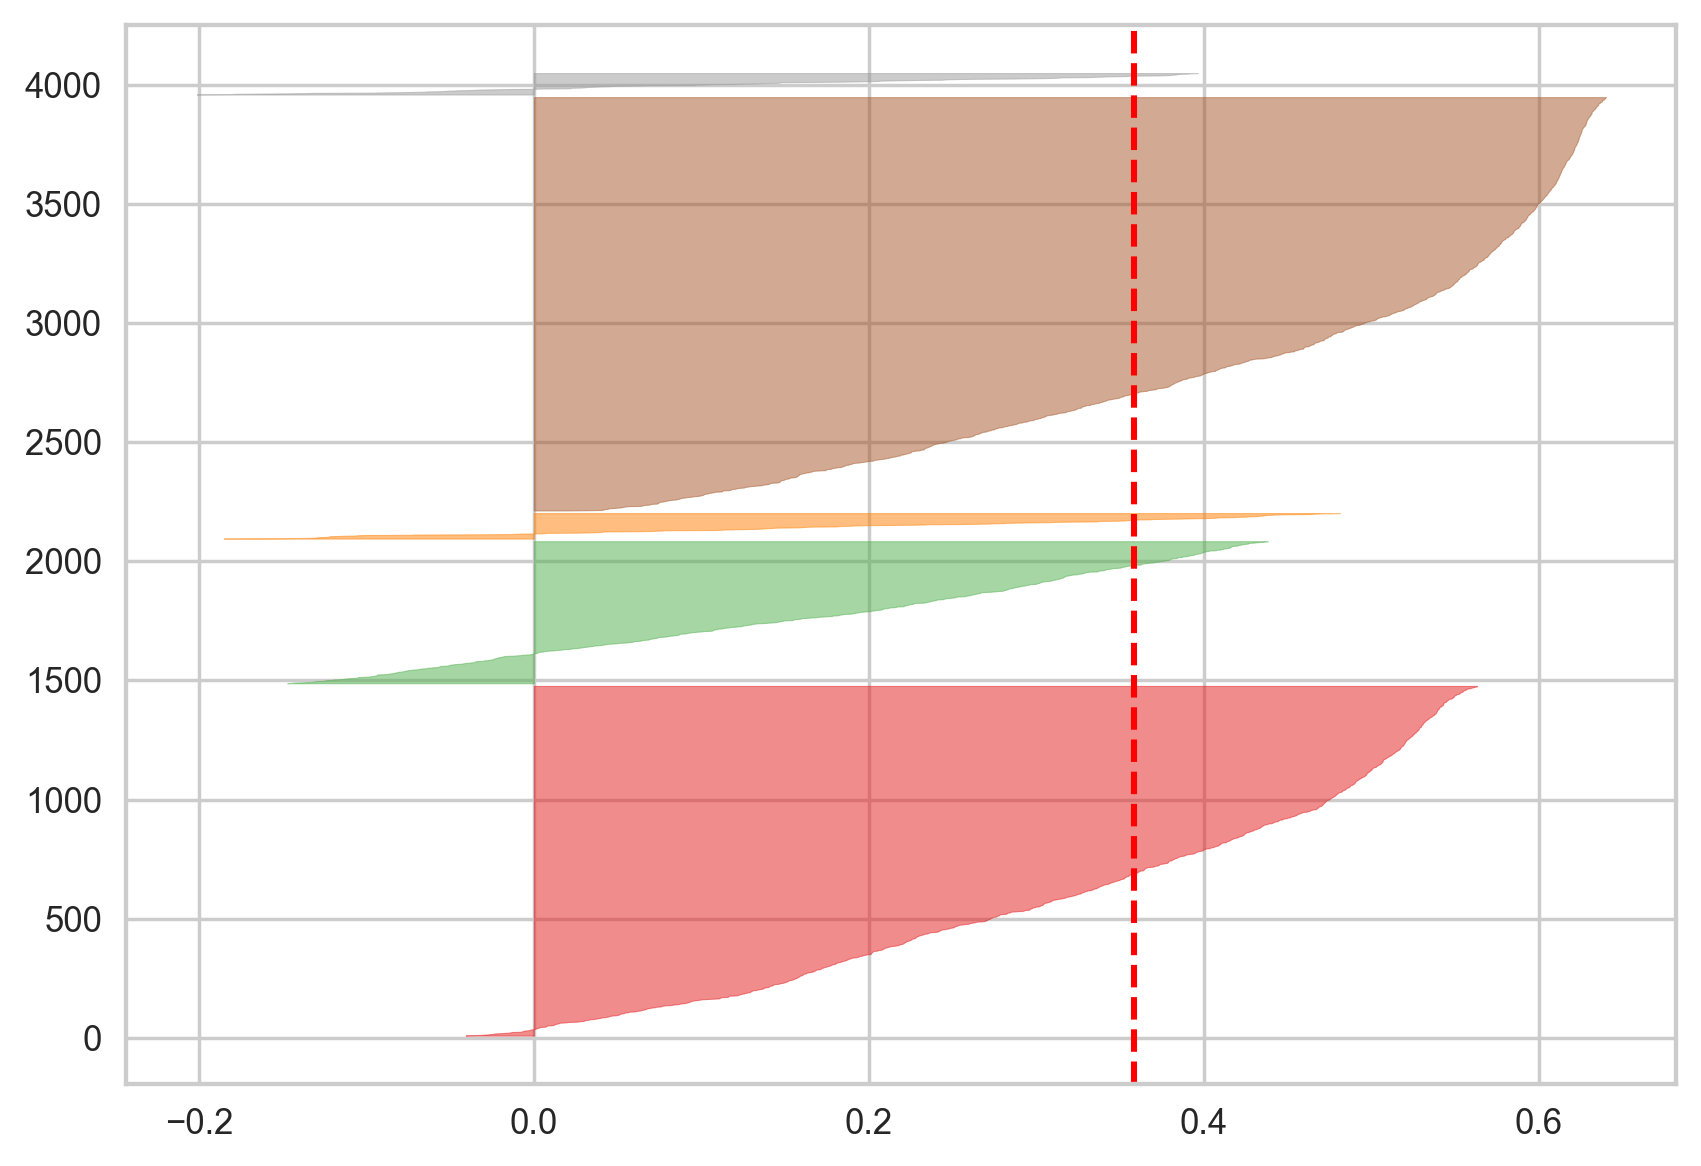

In [45]:
vis.fit(x)